   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

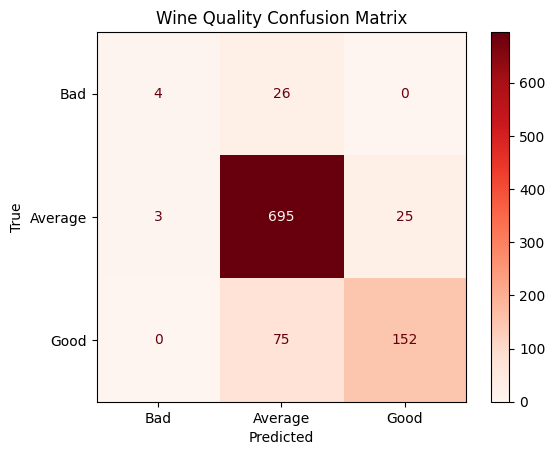

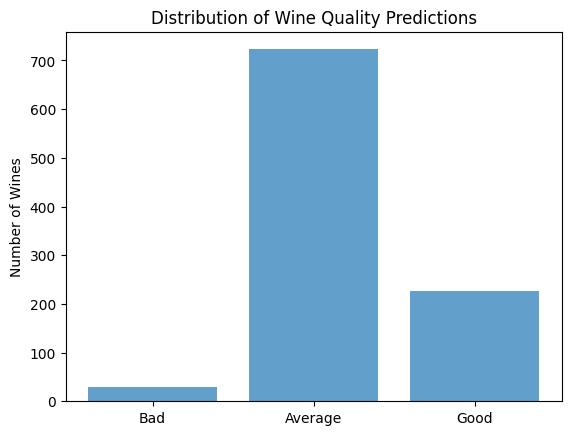

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
data = pd.read_csv('winequality-white.csv', sep=';')
print(data.head())

def quality_label(q):
    if q <= 4:
        return 'Bad'
    elif q <= 6:
        return 'Average'
    else:
        return 'Good'

data['quality_label'] = data['quality'].apply(quality_label)
label_map = {'Bad': 0, 'Average': 1, 'Good': 2}
data['label'] = data['quality_label'].map(label_map)
print(label_map)
X = data.drop(['quality', 'quality_label', 'label'], axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred =model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good']))
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
dis = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Bad','Average','Good'])
dis.plot(cmap = 'Reds')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Wine Quality Confusion Matrix')
plt.show()

quality_labels, counts = np.unique(y_test, return_counts=True)
plt.figure()  # Create a new figure for the second plot
plt.bar(quality_labels, counts, align='center', alpha=0.7)
plt.xticks(quality_labels, ['Bad', 'Average', 'Good'])
plt.ylabel('Number of Wines')
plt.title('Distribution of Wine Quality Predictions')
plt.show()